In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install missingno

In [94]:
import seaborn as sns
import missingno as msno
from scipy import stats

In [4]:
# Load the data
df_userscore=pd.read_csv("userscore.csv")
df_merchants=pd.read_csv("merchants.csv")
df_new_merchant_transactions=pd.read_csv("new_merchant_transactions.csv")
df_historical_transactions=pd.read_csv("historical_transactions.csv")

In [5]:
print(df_userscore.shape)
print(df_merchants.shape)
print(df_new_merchant_transactions.shape)
print(df_historical_transactions.shape)

(201917, 6)
(334696, 22)
(1963031, 14)
(29112361, 14)


#### userscore data

In [6]:
# Explore the data
df_userscore.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749


In [7]:
df_userscore.tail()

,card_id,first_active_month,feature_1,feature_2,feature_3,score
201912,C_ID_963962de2c,Sep-17,3,2,1,-2.740821
201913,C_ID_1314773c0b,Oct-15,3,1,1,0.312917
201914,C_ID_7666735b3d,Aug-17,4,3,0,0.093494
201915,C_ID_73f5a0efd0,Jul-16,3,2,1,-4.676589
201916,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413


In [8]:
df_userscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [9]:
# Get value counts for each column
for col in df_userscore.columns:
    print(df_userscore[col].value_counts())

card_id
C_ID_92a2005557    1
C_ID_c0e5a060f0    1
C_ID_53bf8407d3    1
C_ID_a92c5533af    1
C_ID_e8750a839b    1
                  ..
C_ID_09440ec523    1
C_ID_51c5b870d4    1
C_ID_d39793f151    1
C_ID_e3250f3bae    1
C_ID_92c9984c58    1
Name: count, Length: 201917, dtype: int64
first_active_month
Sep-17    13878
Oct-17    13695
Aug-17    13638
Nov-17    12930
Jul-17    12363
          ...  
Mar-12       10
Nov-11        8
Feb-12        7
Dec-11        2
Feb-18        1
Name: count, Length: 75, dtype: int64
feature_1
3    73573
2    55797
5    40625
4    19885
1    12037
Name: count, dtype: int64
feature_2
1    89242
2    74839
3    37836
Name: count, dtype: int64
feature_3
1    114198
0     87719
Name: count, dtype: int64
score
-33.219281    2207
 0.000000     1630
 1.000000      117
-1.000000       81
-0.584963       35
              ... 
-1.199147        1
 0.491679        1
 0.991680        1
-2.006112        1
-1.859413        1
Name: count, Length: 197110, dtype: int64


df_userscore :
* feature_1 => it has 5 values / categories 
* feature_2 => it has 3 values / categories
* feature_3 => it has 2 values / categories
* score => the label column 

In [10]:
df_userscore.describe(include='all')

,card_id,first_active_month,feature_1,feature_2,feature_3,score
count,201917,201917,201917.000000,201917.000000,201917.000000,201917.000000
unique,201917,75,NaN,NaN,NaN,NaN
top,C_ID_92a2005557,Sep-17,NaN,NaN,NaN,NaN
freq,1,13878,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.105311,1.745410,0.565569,-0.393636
std,NaN,NaN,1.186160,0.751362,0.495683,3.850500
min,NaN,NaN,1.000000,1.000000,0.000000,-33.219281
25%,NaN,NaN,2.000000,1.000000,0.000000,-0.883110
50%,NaN,NaN,3.000000,2.000000,1.000000,-0.023437
75%,NaN,NaN,4.000000,2.000000,1.000000,0.765453


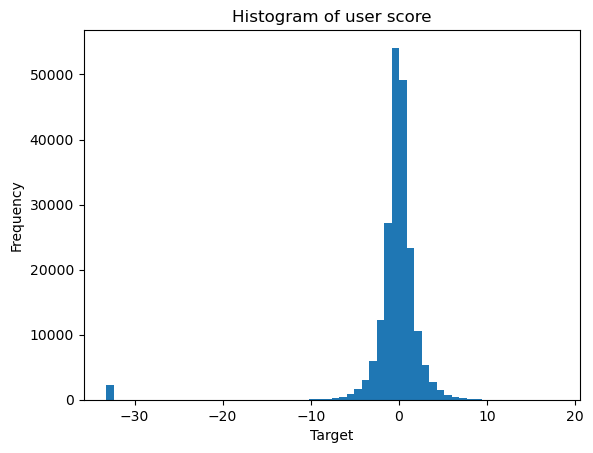

In [11]:
plt.hist(df_userscore["score"], bins=60)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of user score')
plt.show()


<Axes: xlabel='score'>

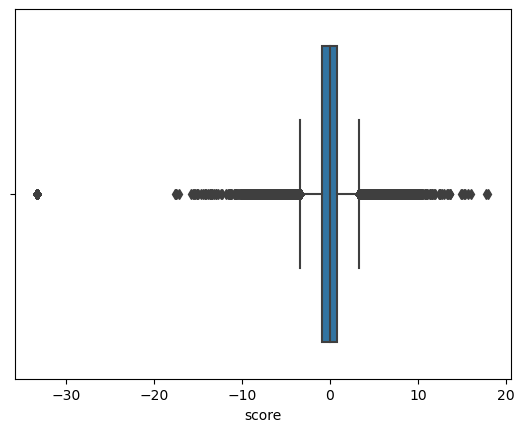

In [12]:
sns.boxplot(df_userscore,x="score")

The min & max values of the score ranges between (-10,10) i guess & there is few values that is less than -30

In [13]:
df_userscore.isna().sum()

card_id               0
first_active_month    0
feature_1             0
feature_2             0
feature_3             0
score                 0
dtype: int64

There is no nulls in userscore data

In [14]:
df_userscore.duplicated().sum()

0

In [15]:
df_userscore.drop(df_userscore[(df_userscore.score <-10) | (df_userscore.score >10)].index,inplace=True)

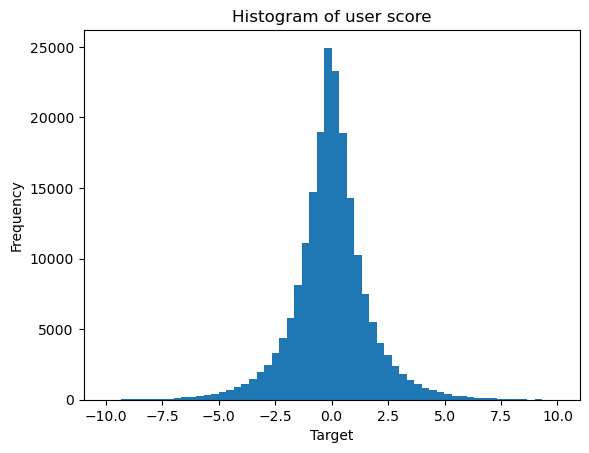

In [16]:
plt.hist(df_userscore["score"], bins=60)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of user score')
plt.show()


Now the score is normally distributed

### Merchat data

In [17]:
df_merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [18]:
df_merchants.tail()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
334691,M_ID_1f4773aa76,1145,705,33,3.174788,-0.047556,N,A,A,1.00,...,0.99,1.019505,6,1.00,1.024796,12,Y,69,9,1.0
334692,M_ID_725a60d404,35,544,29,-0.057471,-0.057471,Y,A,A,0.89,...,0.78,0.813473,6,0.59,0.606765,12,Y,-1,-1,NaN
334693,M_ID_f2045dd267,35,561,7,-0.057471,-0.057471,N,A,A,0.96,...,0.90,0.924769,6,0.74,0.750763,8,Y,160,21,5.0
334694,M_ID_9139332ccc,35,511,7,-0.057471,-0.057471,Y,A,A,0.94,...,0.82,0.783000,6,0.65,0.584000,12,Y,-1,-1,NaN
334695,M_ID_cd2c0b07e9,35,606,17,-0.057471,-0.057471,N,A,A,0.90,...,0.73,0.744417,6,0.53,0.540334,10,Y,69,9,1.0


In [19]:
df_merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [20]:
df_merchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


df_merchants :
* category_2 => i think it represent the rating of the merchant, we have 5 rating values (1 to 5)
* state_id => 25 states
* city_id => 271 cities
* category_4 => it answers a yes or no question
* active_months_lag12 => it has 12 values from 1 to 12, i think from the name it represent the most active month for each merchant
* active_months_lag6 => it has 6 values from 1 to 6 
* active_months_lag3 => it has 3 values from 1 to 3
* most_recent_purchases_range => it has 5 values for A to E, i think it represent the most recent purchases range 
* most_recent_sales_range => it has 5 values for A to E too, i think it represent the most recent sales range 
* category_1 => it represent an answer for a yes or no question

In [21]:
df_merchants.duplicated().sum()

0

### new_merchant_transactions data

In [22]:
df_new_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [23]:
df_new_merchant_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01


In [24]:
df_new_merchant_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


df_new_merchant_transactions : 
* category_1 => it answers a yes or no question
* category_3 => it has 3 categories A,B,C
* month_lag => it has 2 values only 1 & 2
* category_2 => i think it represent the rating of the merchant, we have 5 rating values (1 to 5)

In [25]:
df_new_merchant_transactions.duplicated().sum()

0

### historical_transactions data

In [26]:
df_historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [27]:
df_historical_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


In [28]:
df_historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


* authorized_flag => it answers a yes or no question
* category_1 => it answers a yes or no question
* category_3 => it has 3 categories
* category_2 => it has 5 values from 1 to 5 (rateing)
the other columns are clear and can be understood from their names

In [29]:
df_merchants.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

<Axes: >

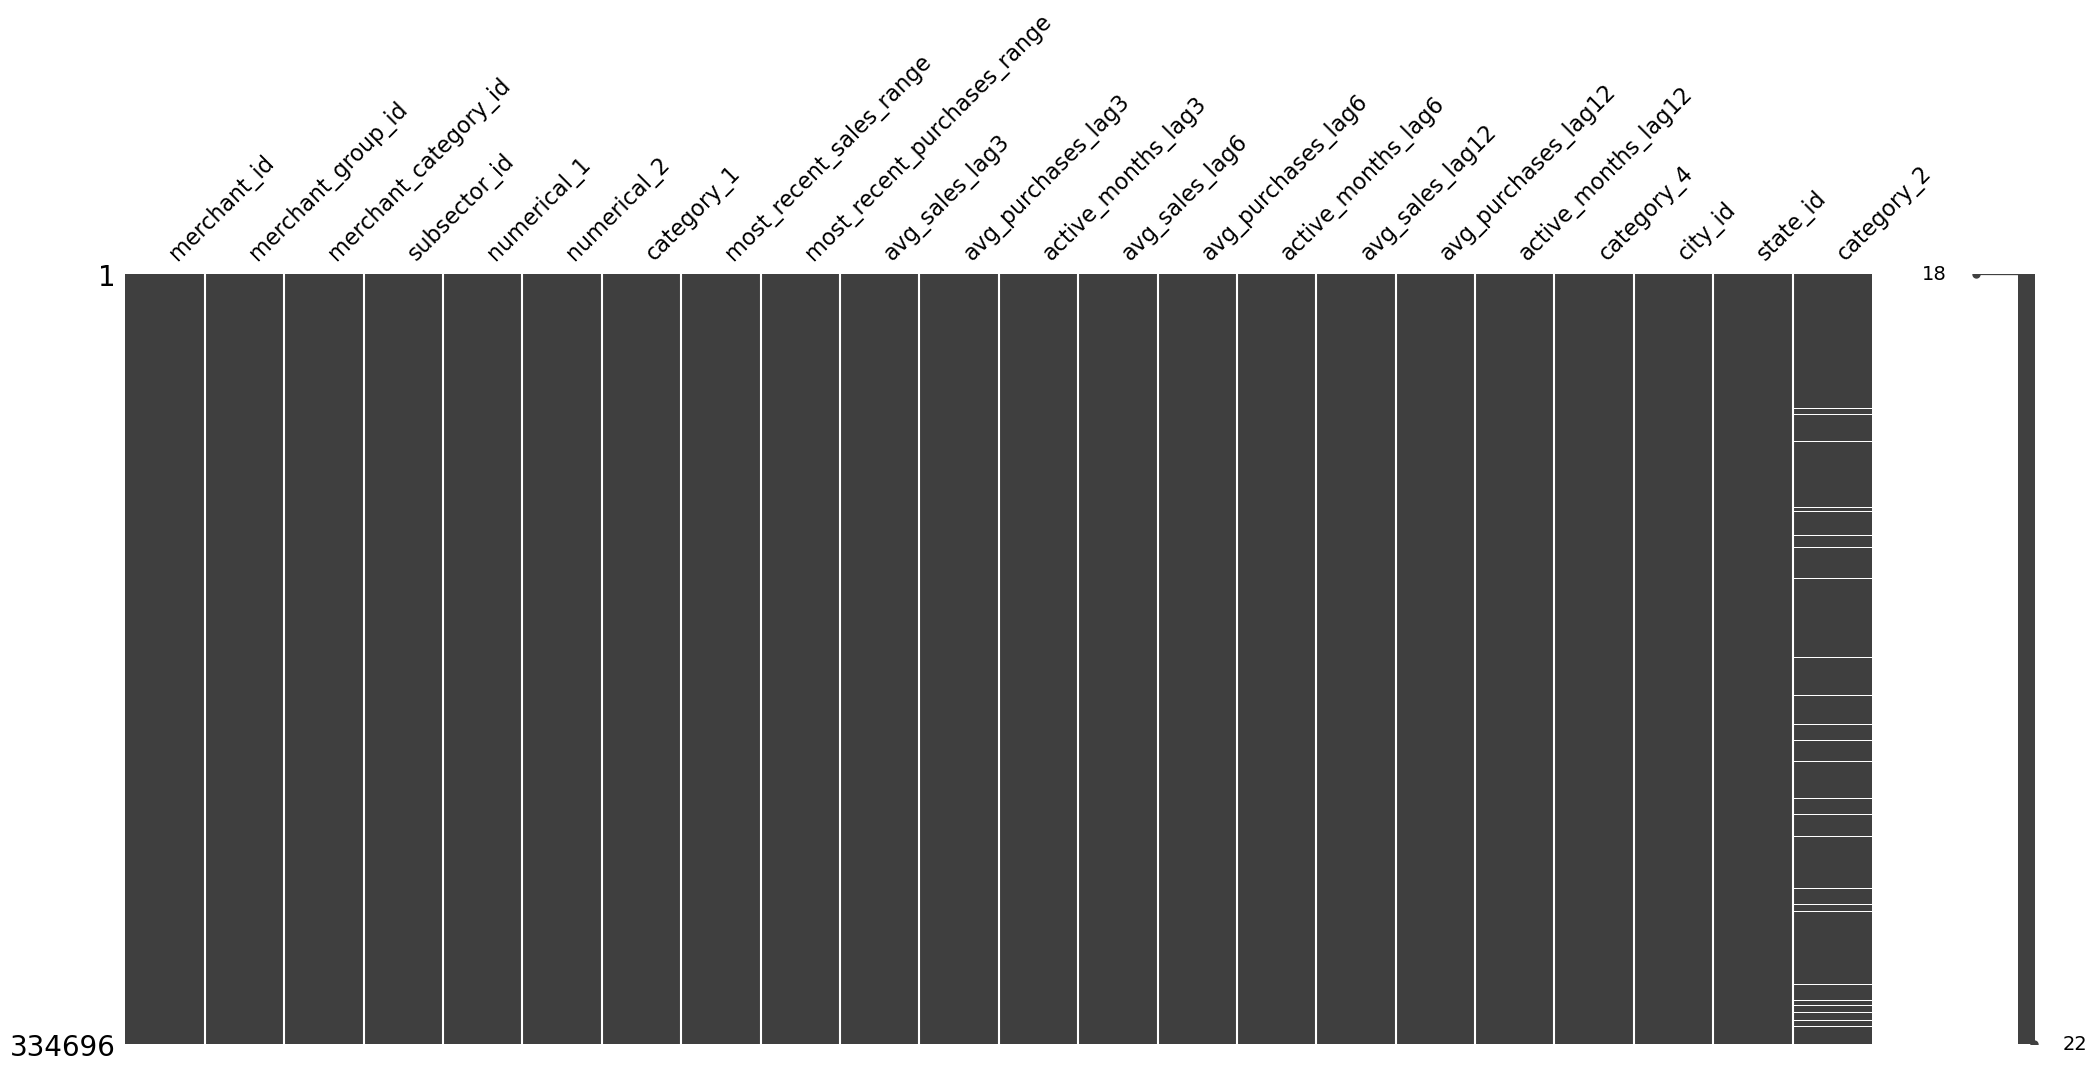

In [30]:
msno.matrix(df_merchants)

<Axes: >

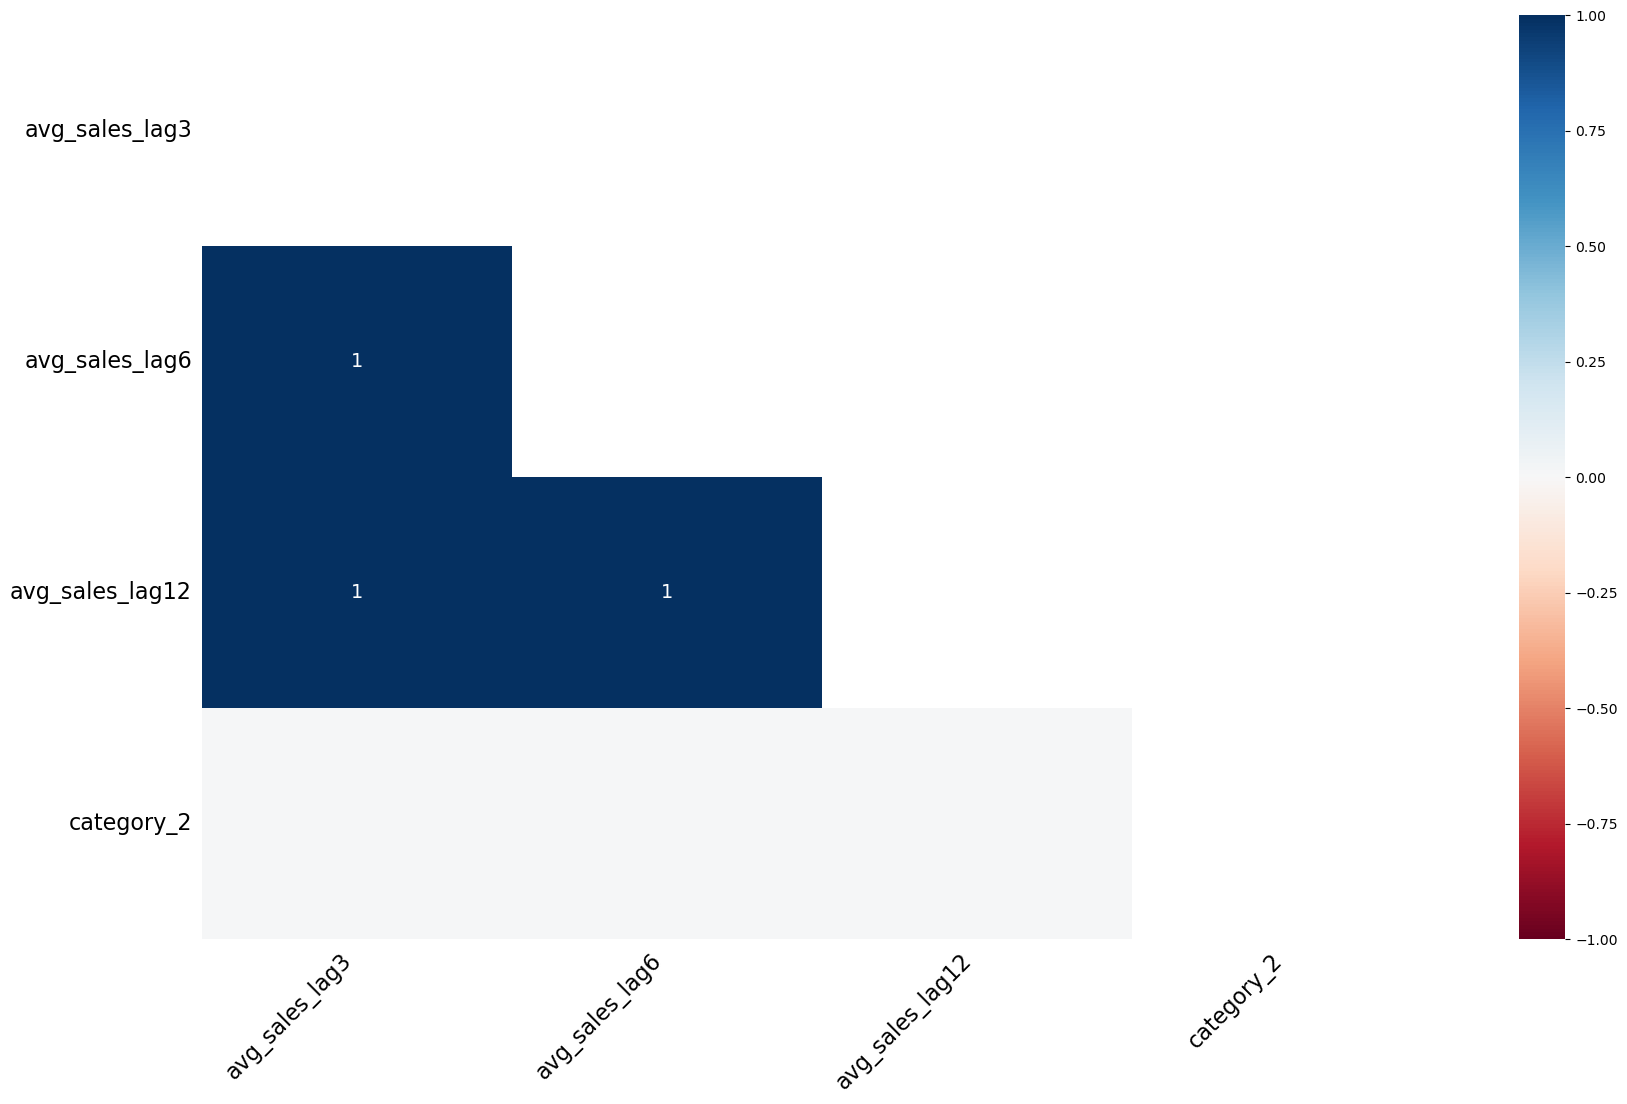

In [31]:
msno.heatmap(df_merchants)

* the category_2 column has the highest number of missing values and it represent 3.5% of the data so we can drop them
* the pattern of missing is general and the mechanism is MCAR in column "category_2 " as there is no correlation between it and other variables but I think in "avg_sale_lag3&6&12" the mechanism is MAR as the correlation between them is 1 and that means The probability of a variable being missing depends on the other observed variables only.

In [32]:
df_merchants.shape

(334696, 22)

In [33]:
df_merchants.dropna(inplace=True)

In [34]:
df_merchants.shape

(322802, 22)

In [35]:
df_new_merchant_transactions.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

<Axes: >

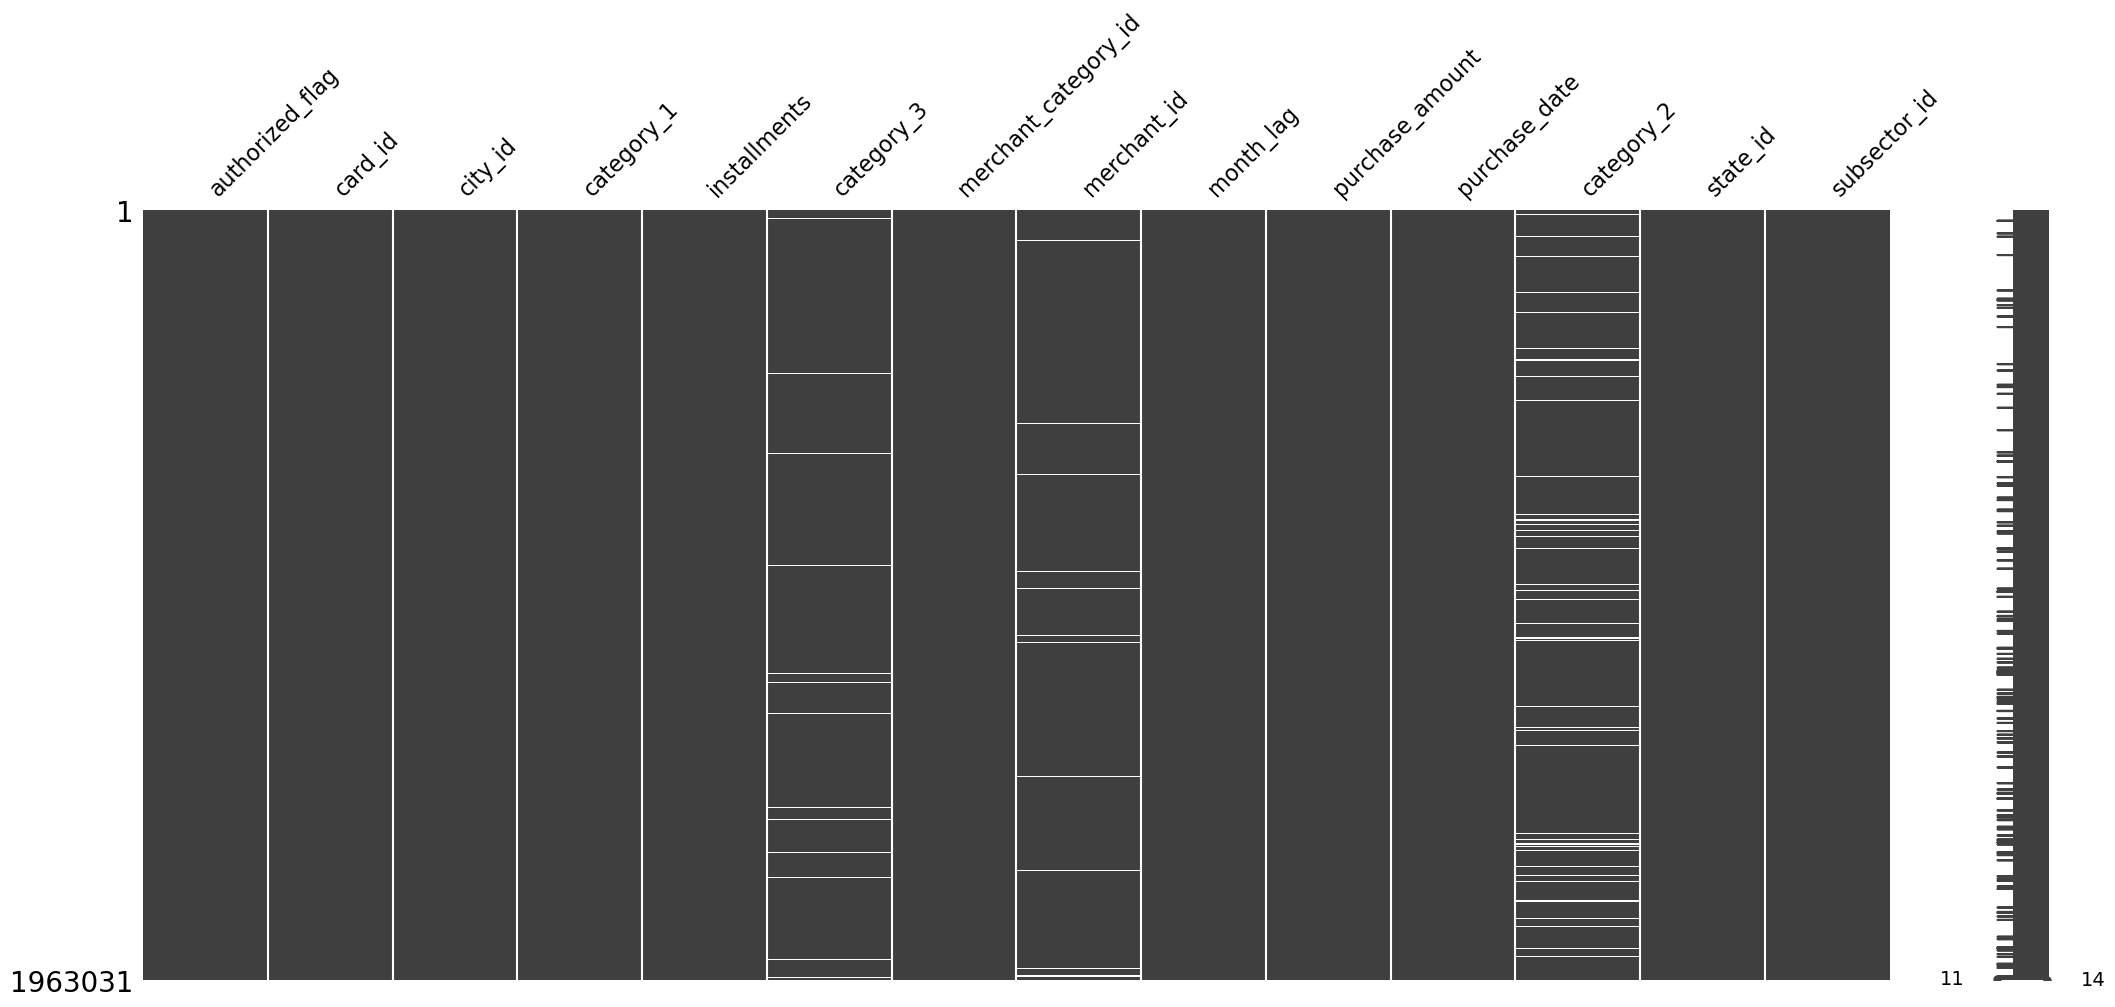

In [36]:
msno.matrix(df_new_merchant_transactions)

<Axes: >

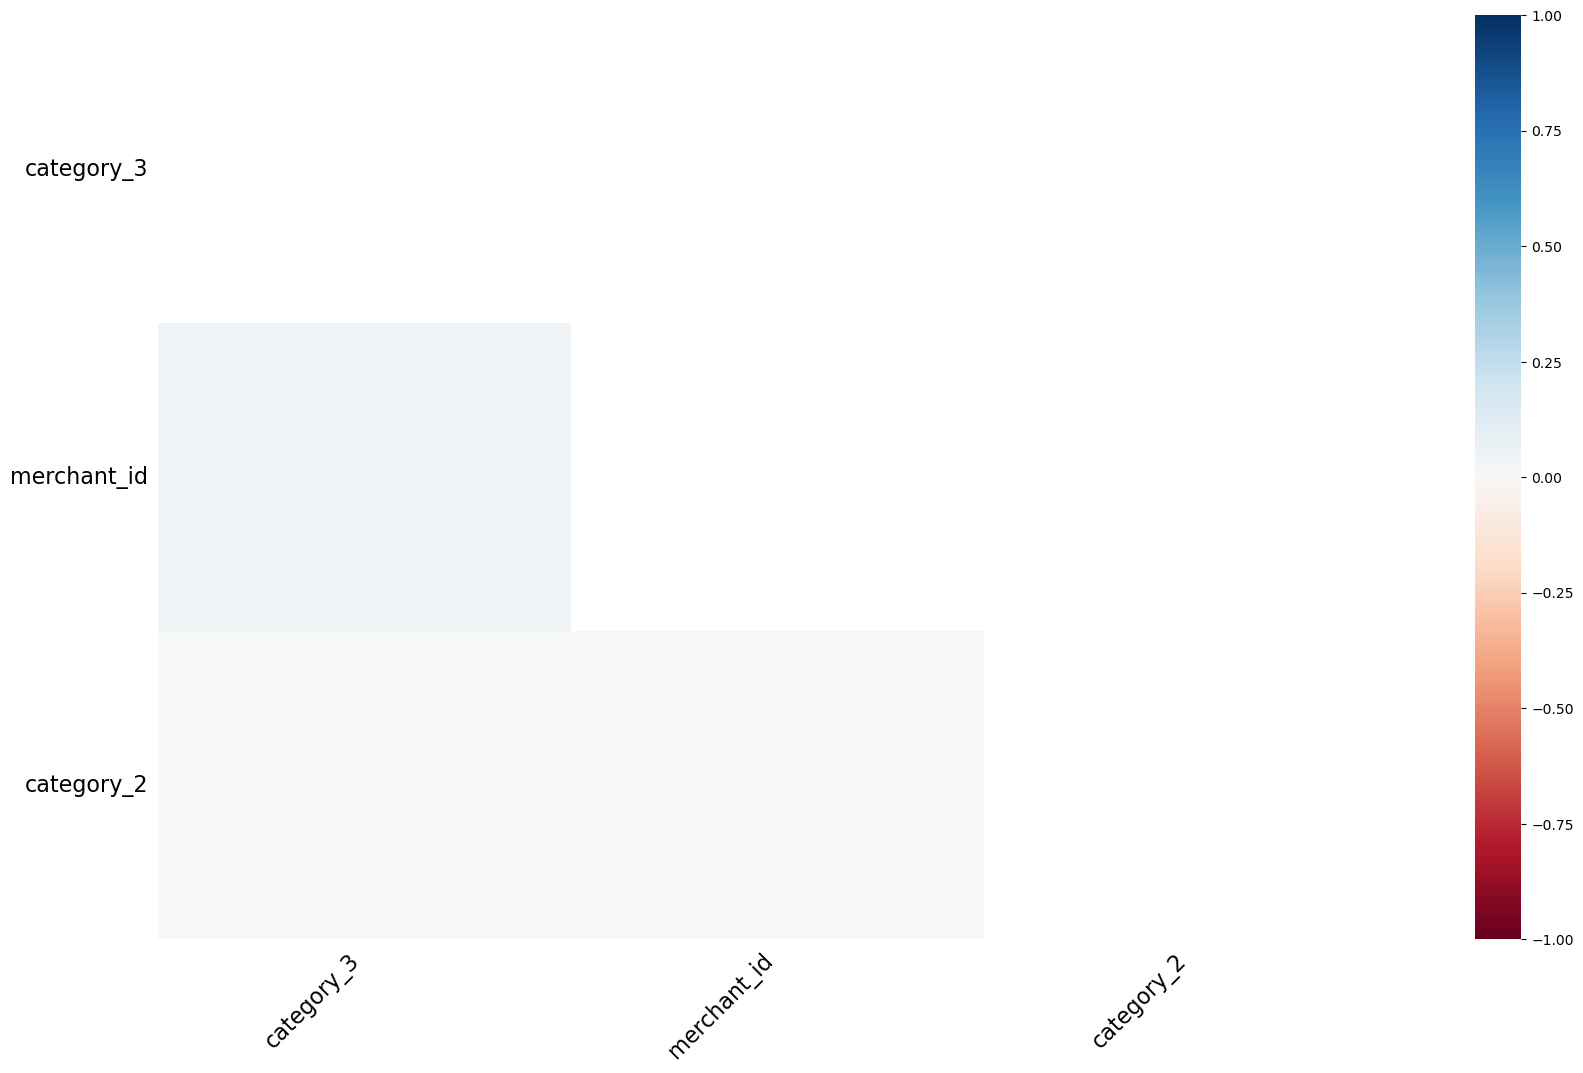

In [37]:
msno.heatmap(df_new_merchant_transactions)

* the category_2 column has the highest number of missing values and it represent 5% of the data so we can drop them
* the pattern of missing is General and the mechanism is MCAR as the the reason for missing data is unrelated to any observed or unobserved variables and that is shown from the heatmap

In [38]:
df_new_merchant_transactions.dropna(inplace=True)

In [39]:
df_new_merchant_transactions.shape

(1776146, 14)

In [40]:
df_historical_transactions.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [41]:
def reduce_memory_usage(df, verbose=True):
    
    
    '''
    This function reduces the memory sizes of dataframe by changing the datatypes of the columns.
    Parameters
    df - DataFrame whose size to be reduced
    verbose - Boolean, to mention the verbose required or not.
    '''
    numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [42]:
reduce_memory_usage(df_historical_transactions)

Mem. usage decreased to 2026.75 Mb (34.8% reduction)


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112356,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,-1,-0.632706,2017-01-20 08:52:04,NaN,-1,34
29112357,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,0,-0.632706,2017-02-20 04:40:50,NaN,-1,34
29112358,Y,C_ID_5c240d6e3c,3,N,0,A,278,M_ID_9cdcfe8673,0,-0.657740,2017-12-26 18:37:51,1.0,16,37
29112359,Y,C_ID_5c240d6e3c,331,N,0,A,514,M_ID_1a75f94f92,-1,0.770620,2017-11-24 14:18:15,1.0,16,9


<Axes: >

/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:180: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


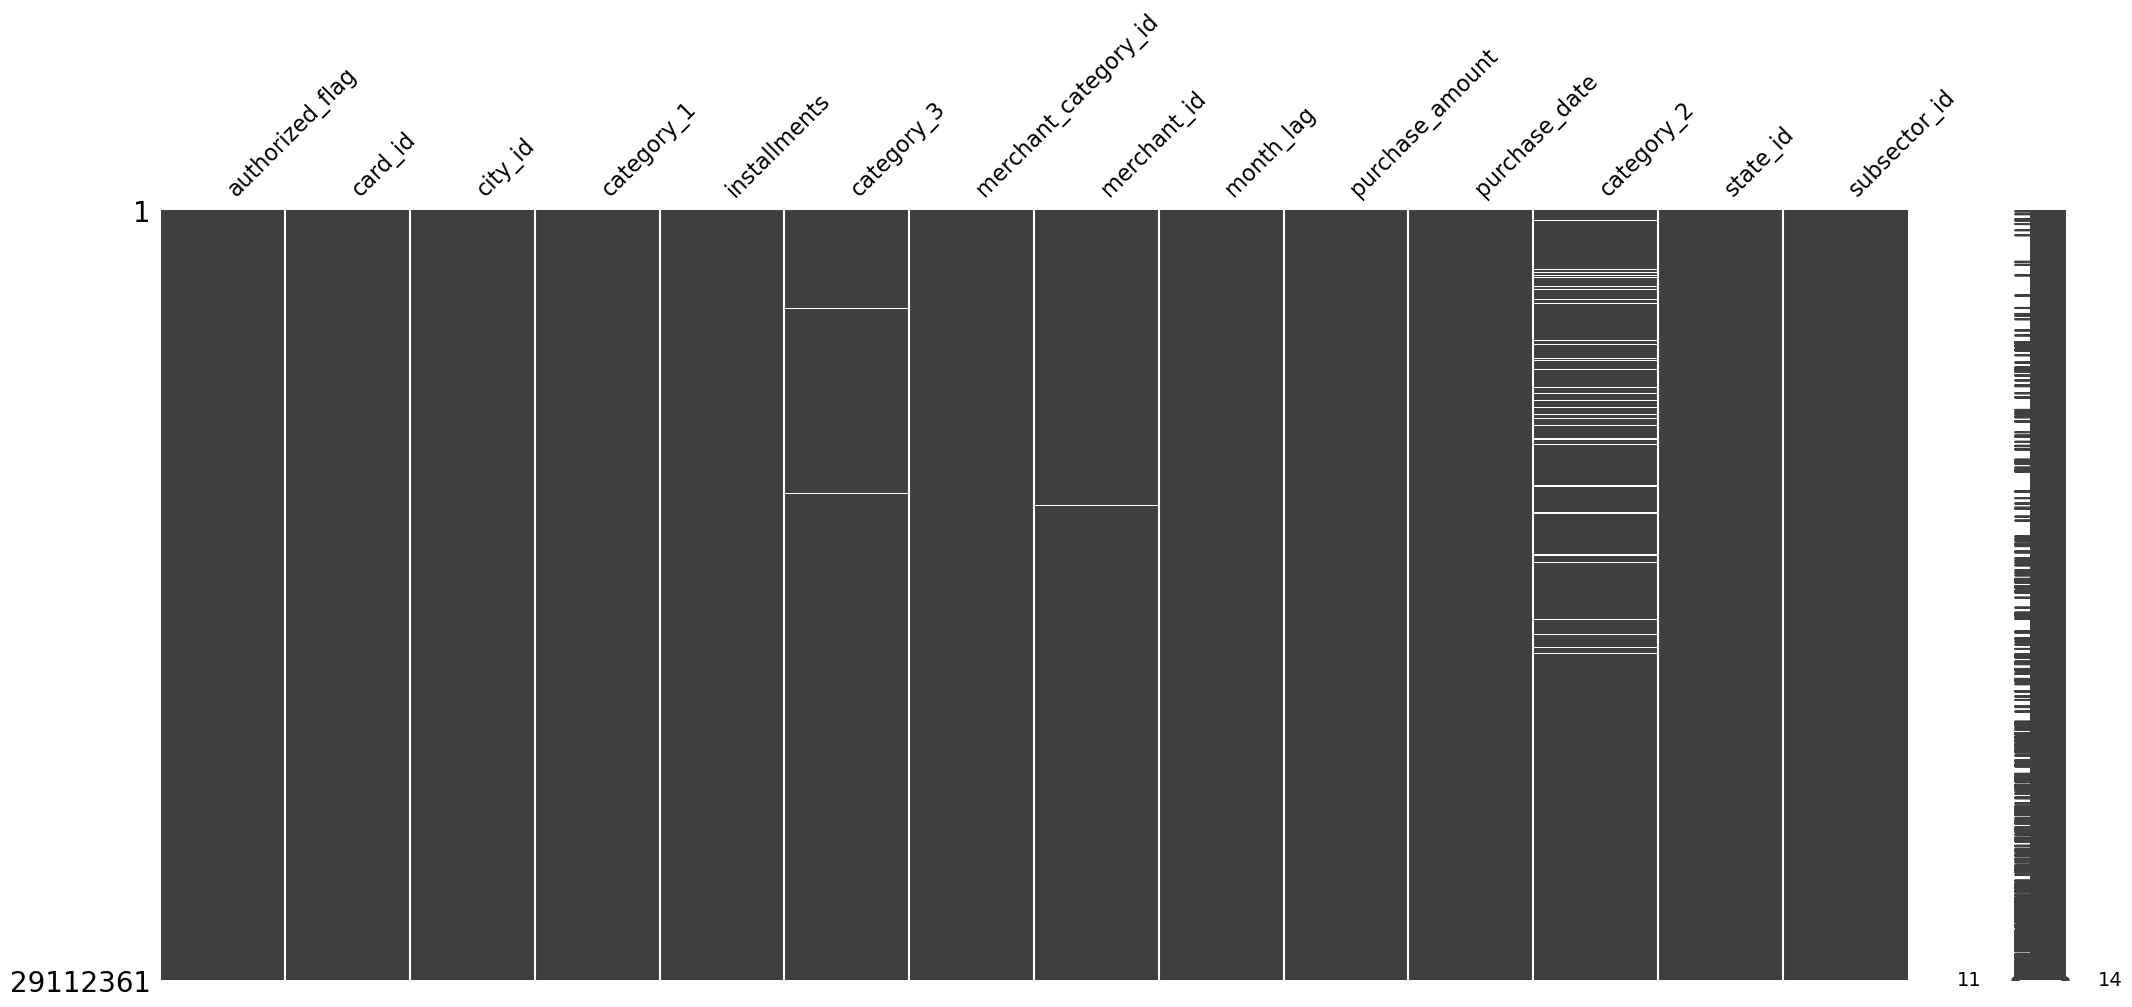

In [39]:
msno.matrix(df_historical_transactions)

<Axes: >

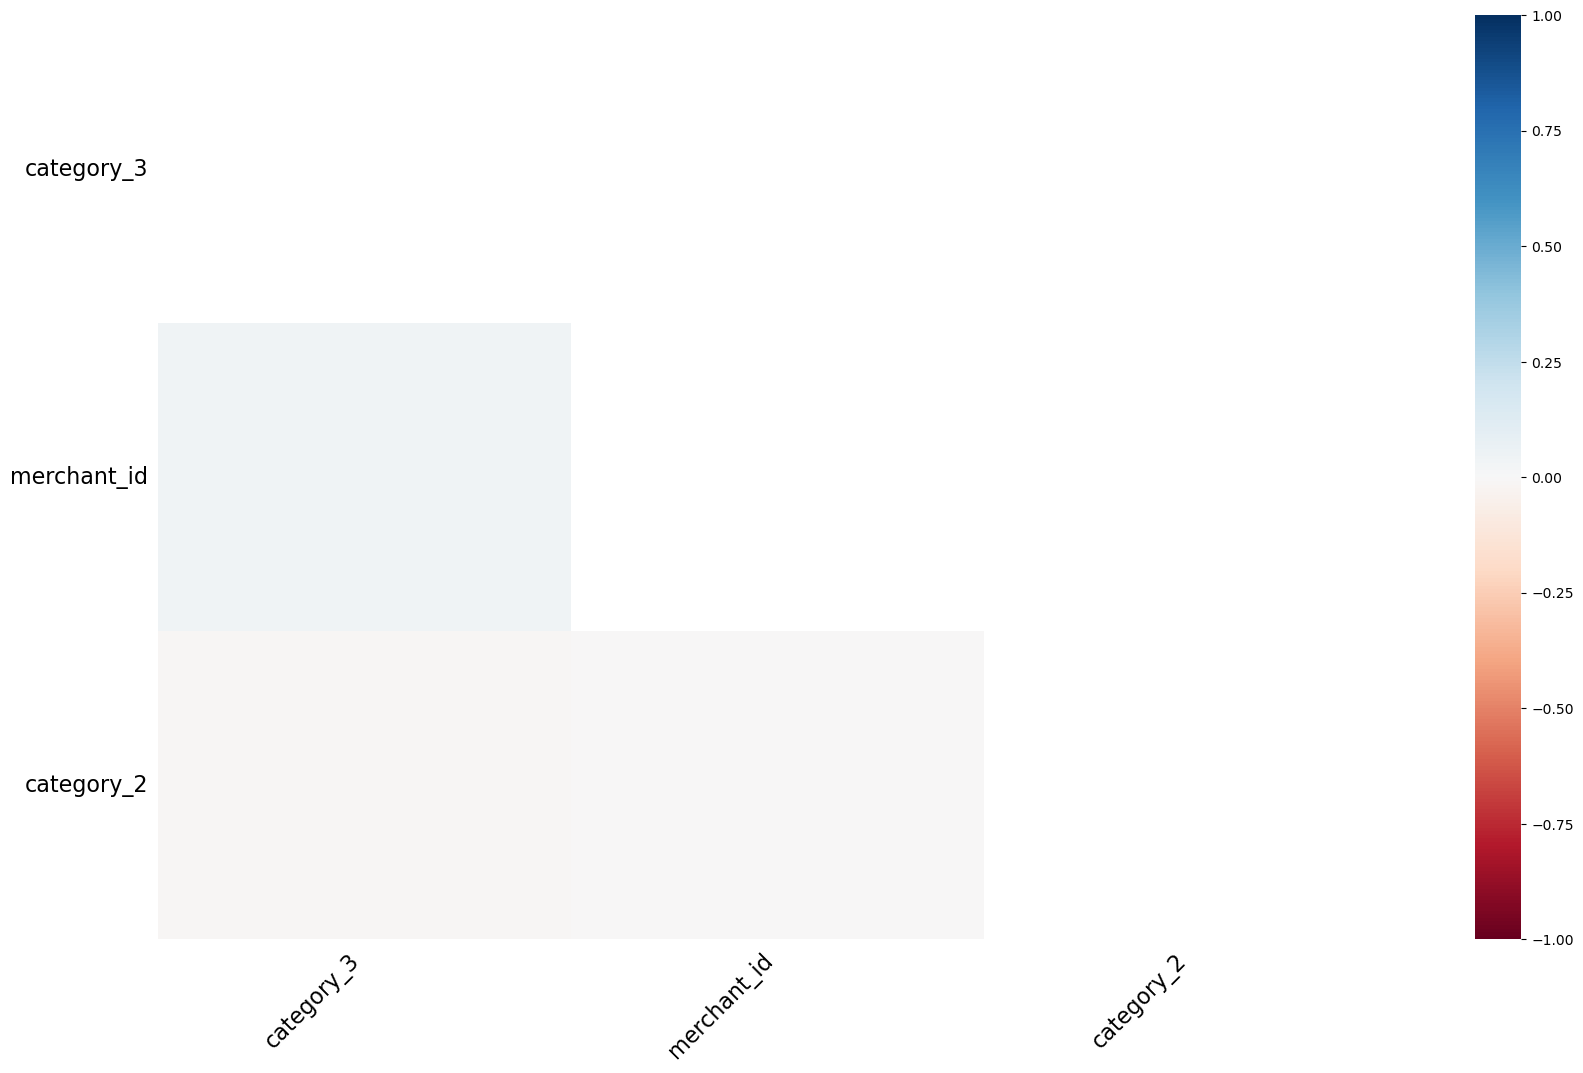

In [45]:
msno.heatmap(df_historical_transactions)

* the category_2 column has the highest number of missing values and it only represent 9% of the data so I will drop them
* the pattern of missing is General and the mechanism is MCAR as the the reason for missing data is unrelated to any observed or unobserved variables and that is shown from the heatmap

In [46]:
df_historical_transactions.dropna(inplace=True)

In [47]:
df_historical_transactions.shape

(26169697, 14)

In [48]:
df_transactions = pd.concat([df_historical_transactions, df_new_merchant_transactions], ignore_index=True)

In [49]:
df_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [50]:
# I will merge the transactions dataframe with the merchants datframe based on the common columns between them 
# so that each transaction record contains also the merchant data that this transaction was done with

common_cols = list(df_transactions.columns.intersection(df_merchants.columns))
common_cols

['city_id',
 'category_1',
 'merchant_category_id',
 'merchant_id',
 'category_2',
 'state_id',
 'subsector_id']

In [51]:
df_merchant_transactions = pd.merge(df_transactions, df_merchants, on=common_cols , how ='inner')

In [52]:
df_merchant_transactions.shape

(18223981, 29)

In [53]:
df_merchant_transactions.isna().sum()

authorized_flag                0
card_id                        0
city_id                        0
category_1                     0
installments                   0
category_3                     0
merchant_category_id           0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2                     0
state_id                       0
subsector_id                   0
merchant_group_id              0
numerical_1                    0
numerical_2                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
dtype: int64

In [54]:
df_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.741649,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
3,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.745405,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.737892,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y


In [55]:
df_merchant_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18223981 entries, 0 to 18223980
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id                      int64  
 3   category_1                   object 
 4   installments                 int64  
 5   category_3                   object 
 6   merchant_category_id         int64  
 7   merchant_id                  object 
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                object 
 11  category_2                   float64
 12  state_id                     int64  
 13  subsector_id                 int64  
 14  merchant_group_id            int64  
 15  numerical_1                  float64
 16  numerical_2                  float64
 17  most_recent_sales_range      object 
 18  most_recent_purchases_range  object 
 19

In [60]:
# Calculate rate of flags per customer card
df_merchant_transactions['authorized_flag_0_1'] = np.where(df_merchant_transactions['authorized_flag'] =="Y", 1, 0)
authorized_flag_rate = round(df_merchant_transactions.groupby('card_id')['authorized_flag_0_1'].mean(), 2)

# Calculate most frequent city per customer
city =df_merchant_transactions.groupby('card_id')['city_id'].agg(lambda x: x.mode()[0])

# Calculate rate of category_1 per customer card
df_merchant_transactions['category_1_0_1'] = np.where(df_merchant_transactions['category_1'] =="Y", 1, 0)
category_1_rate = df_merchant_transactions.groupby('card_id')['category_1_0_1'].mean()


In [56]:
# Calculate sum of installments per card
installments = df_merchant_transactions.groupby('card_id')['installments'].max()

# Calculate most frequent of category_3 per card
category_3 =df_merchant_transactions.groupby('card_id')['category_3'].agg(lambda x: x.mode()[0])
# Calculate most frequent of merchants the customer used to deal with
merchants = df_merchant_transactions.groupby('card_id')['merchant_id'].agg(lambda x: x.mode()[0])

In [57]:


# Calculate mean for month_lag per customer
month_lag = df_merchant_transactions.groupby('card_id')['month_lag'].mean()

# Calculate mean purchases per customer
purchase_amount = df_merchant_transactions.groupby('card_id')['purchase_amount'].sum()

# Calculate avg_sales_lag3 of most frequent merchants the customer used to deal with
avg_sales_lag3 = df_merchant_transactions.groupby('card_id')['avg_sales_lag3'].agg(lambda x: x.mode()[0])



# Calculate avg_sales_lag6 of most frequent merchants the customer used to deal with
avg_sales_lag6 = df_merchant_transactions.groupby('card_id')['avg_sales_lag6'].agg(lambda x: x.mode()[0])

# Calculate avg_sales_lag12 of most frequent merchants the customer used to deal with
avg_sales_lag12 = df_merchant_transactions.groupby('card_id')['avg_sales_lag12'].agg(lambda x: x.mode()[0])


In [58]:

# Calculate avg_purchases_lag3 of most frequent merchants the customer used to deal with
avg_purchases_lag3 = df_merchant_transactions.groupby('card_id')['avg_purchases_lag3'].agg(lambda x: x.mode()[0])
# Calculate avg_purchases_lag6 of most frequent merchants the customer used to deal with
avg_purchases_lag6 = df_merchant_transactions.groupby('card_id')['avg_purchases_lag6'].agg(lambda x: x.mode()[0])

# Calculate avg_purchases_lag12 of most frequent merchants the customer used to deal with
avg_purchases_lag12 = df_merchant_transactions.groupby('card_id')['avg_purchases_lag12'].agg(lambda x: x.mode()[0])


# Calculate active_months_lag3 of most frequent merchants the customer used to deal with
active_months_lag3 = df_merchant_transactions.groupby('card_id')['active_months_lag3'].agg(lambda x: x.mode()[0])
# Calculate active_months_lag6 of most frequent merchants the customer used to deal with
active_months_lag6 = df_merchant_transactions.groupby('card_id')['active_months_lag6'].agg(lambda x: x.mode()[0])
# Calculate active_months_lag12 of most frequent merchants the customer used to deal with
active_months_lag12 = df_merchant_transactions.groupby('card_id')['active_months_lag12'].agg(lambda x: x.mode()[0])


# Calculate rate of category_4 per customer card
df_merchant_transactions['category_4_0_1'] = np.where(df_merchant_transactions['category_4'] =="Y", 1, 0)
category_4_rate = round(df_merchant_transactions.groupby('card_id')['category_4_0_1'].mean(), 2)


In [61]:

# Concatenate new features into one DataFrame
features = pd.concat([authorized_flag_rate, city, category_1_rate, installments, category_3, merchants, month_lag, purchase_amount, avg_sales_lag3, avg_sales_lag6, avg_sales_lag12,
                      avg_purchases_lag3, avg_purchases_lag6, avg_purchases_lag12, active_months_lag3, active_months_lag6, active_months_lag12, category_4_rate ], axis=1)
features.columns = ['authorized_flag_rate', 'city', 'category_1_rate', 'installments', 'category_3', 'merchants', 'month_lag', 'purchase_amount', 'avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12',
                      'avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12', 'active_months_lag3', 'active_months_lag6', 'active_months_lag12', 'category_4_rate' ]

In [62]:
features.head()

,authorized_flag_rate,city,category_1_rate,installments,category_3,merchants,month_lag,purchase_amount,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12,active_months_lag3,active_months_lag6,active_months_lag12,category_4_rate
card_id,,,,,,,,,,,,,,,,,,
C_ID_00007093c1,0.76,76,0.0,6,B,M_ID_d96a11b2df,-3.235294,-8.714220,0.96,0.95,0.93,0.967538,0.951302,0.920479,3,6,12,1.00
C_ID_0001238066,0.99,314,0.0,10,B,M_ID_d17aabd756,-1.378378,-67.462697,0.98,0.99,1.03,0.982012,0.984455,0.990617,3,6,12,0.15
C_ID_0001506ef0,0.93,137,0.0,1,A,M_ID_b1fc88154d,-4.254545,-27.083304,1.00,1.02,0.95,1.066087,1.087142,1.095145,3,6,12,1.00
C_ID_0001793786,0.94,204,0.0,1,A,M_ID_7aba38d825,-2.397059,7.048426,1.00,1.00,1.04,0.992312,0.987446,0.992137,3,6,12,0.38
C_ID_000183fdda,0.95,161,0.0,10,B,M_ID_f9cfe0a43b,-2.316239,-65.453998,1.05,1.02,0.98,1.056556,1.027423,1.008010,3,6,12,1.00


In [63]:
features.reset_index(inplace=True)
features.head()

,card_id,authorized_flag_rate,city,category_1_rate,installments,category_3,merchants,month_lag,purchase_amount,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12,active_months_lag3,active_months_lag6,active_months_lag12,category_4_rate
0,C_ID_00007093c1,0.76,76,0.0,6,B,M_ID_d96a11b2df,-3.235294,-8.714220,0.96,0.95,0.93,0.967538,0.951302,0.920479,3,6,12,1.00
1,C_ID_0001238066,0.99,314,0.0,10,B,M_ID_d17aabd756,-1.378378,-67.462697,0.98,0.99,1.03,0.982012,0.984455,0.990617,3,6,12,0.15
2,C_ID_0001506ef0,0.93,137,0.0,1,A,M_ID_b1fc88154d,-4.254545,-27.083304,1.00,1.02,0.95,1.066087,1.087142,1.095145,3,6,12,1.00
3,C_ID_0001793786,0.94,204,0.0,1,A,M_ID_7aba38d825,-2.397059,7.048426,1.00,1.00,1.04,0.992312,0.987446,0.992137,3,6,12,0.38
4,C_ID_000183fdda,0.95,161,0.0,10,B,M_ID_f9cfe0a43b,-2.316239,-65.453998,1.05,1.02,0.98,1.056556,1.027423,1.008010,3,6,12,1.00


In [122]:
data = df_userscore.merge(features, on=['card_id'], how='inner')

In [123]:
data.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score,authorized_flag_rate,city,category_1_rate,installments,...,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12,active_months_lag3,active_months_lag6,active_months_lag12,category_4_rate
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,0.97,69,0.0,1,...,0.93,0.90,0.93,0.979454,0.953233,0.981699,3,6,12,0.95
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913,0.97,69,0.0,10,...,1.07,1.10,1.11,1.065682,1.081449,1.132069,3,6,12,0.96
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056,0.95,143,0.0,0,...,1.00,1.01,1.02,1.007511,1.033525,1.052752,3,6,12,0.95
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495,1.00,17,0.0,2,...,1.12,1.14,1.19,1.126547,1.143512,1.189079,3,6,12,0.98
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749,0.98,17,0.0,1,...,1.11,1.04,1.02,1.103070,1.054094,1.055007,3,6,12,1.00


In [66]:
data.describe(include="all")

,card_id,first_active_month,feature_1,feature_2,feature_3,score,authorized_flag_rate,city,category_1_rate,installments,...,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12,active_months_lag3,active_months_lag6,active_months_lag12,category_4_rate
count,181739,181739,181739.000000,181739.000000,181739.000000,181739.000000,181739.000000,181739.000000,181739.0,181739.000000,...,181739.000000,181739.000000,181739.000000,181739.000000,181739.000000,181739.000000,181739.000000,181739.000000,181739.000000,181739.000000
unique,181739,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C_ID_92a2005557,Sep-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,12564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.113300,1.737068,0.567567,-0.043554,0.925440,139.609803,0.0,2.940343,...,165.173913,153.970839,134.472876,13.733490,12.731695,11.713772,2.999939,5.999384,11.958000,0.496567
std,NaN,NaN,1.190589,0.750752,0.495415,1.683160,0.112237,92.496299,0.0,17.173002,...,11820.320418,10842.438526,9568.632674,882.461618,800.150091,716.621367,0.009671,0.041562,0.394322,0.437123
min,NaN,NaN,1.000000,1.000000,0.000000,-9.978336,0.000000,1.000000,0.0,0.000000,...,0.330000,0.160000,0.150000,0.333495,0.167045,0.102951,1.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,2.000000,1.000000,0.000000,-0.850047,0.900000,69.000000,0.0,0.000000,...,0.970000,0.950000,0.950000,0.978726,0.965316,0.965457,3.000000,6.000000,12.000000,0.010000
50%,NaN,NaN,3.000000,2.000000,1.000000,-0.023991,0.960000,137.000000,0.0,1.000000,...,1.010000,1.010000,1.020000,1.013574,1.019505,1.032011,3.000000,6.000000,12.000000,0.480000
75%,NaN,NaN,4.000000,2.000000,1.000000,0.760177,1.000000,212.000000,0.0,4.000000,...,1.050000,1.070000,1.110000,1.066270,1.087142,1.117407,3.000000,6.000000,12.000000,0.980000


In [67]:
data.columns

Index(['card_id', 'first_active_month', 'feature_1', 'feature_2', 'feature_3',
       'score', 'authorized_flag_rate', 'city', 'category_1_rate',
       'installments', 'category_3', 'merchants', 'month_lag',
       'purchase_amount', 'avg_sales_lag3', 'avg_sales_lag6',
       'avg_sales_lag12', 'avg_purchases_lag3', 'avg_purchases_lag6',
       'avg_purchases_lag12', 'active_months_lag3', 'active_months_lag6',
       'active_months_lag12', 'category_4_rate'],
      dtype='object')

In [124]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
numeric_cols

,feature_1,feature_2,feature_3,score,authorized_flag_rate,city,category_1_rate,installments,month_lag,purchase_amount,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12,active_months_lag3,active_months_lag6,active_months_lag12,category_4_rate
0,5,2,1,-0.820283,0.97,69,0.0,1,-3.675325,-146.512667,0.93,0.90,0.93,0.979454,0.953233,0.981699,3,6,12,0.95
1,4,1,0,0.392913,0.97,69,0.0,10,-4.569853,-171.431507,1.07,1.10,1.11,1.065682,1.081449,1.132069,3,6,12,0.96
2,2,2,0,0.688056,0.95,143,0.0,0,-8.275000,-27.578112,1.00,1.01,1.02,1.007511,1.033525,1.052752,3,6,12,0.95
3,4,3,0,0.142495,1.00,17,0.0,2,-2.732143,-39.098052,1.12,1.14,1.19,1.126547,1.143512,1.189079,3,6,12,0.98
4,1,3,0,-0.159749,0.98,17,0.0,1,-0.846847,-73.032664,1.11,1.04,1.02,1.103070,1.054094,1.055007,3,6,12,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181734,3,2,1,-2.740821,0.94,135,0.0,0,-2.645161,-21.917926,1.01,0.99,0.93,1.057026,1.051680,0.992957,3,6,12,0.48
181735,3,1,1,0.312917,0.95,90,0.0,0,-3.189189,-26.538112,1.05,1.07,1.12,1.049610,1.037305,1.057349,3,6,12,0.00
181736,4,3,0,0.093494,1.00,251,0.0,3,-3.595238,-23.650783,1.01,0.96,1.15,1.024828,1.046274,1.040362,3,6,12,0.90
181737,3,2,1,-4.676589,0.96,69,0.0,0,-2.807692,-12.384941,1.02,1.06,0.96,1.045434,1.063237,1.084568,3,6,12,0.96


In [125]:
cat_cols = data.select_dtypes(include=['object'])
cat_cols

,card_id,first_active_month,category_3,merchants
0,C_ID_92a2005557,Jun-17,A,M_ID_1a81c358a3
1,C_ID_3d0044924f,Jan-17,B,M_ID_940fb4498f
2,C_ID_d639edf6cd,Aug-16,A,M_ID_5634fd83e0
3,C_ID_186d6a6901,Sep-17,B,M_ID_48257bb851
4,C_ID_cdbd2c0db2,Nov-17,B,M_ID_cecefd9589
...,...,...,...,...
181734,C_ID_963962de2c,Sep-17,A,M_ID_e7e5f8a062
181735,C_ID_1314773c0b,Oct-15,A,M_ID_1f34dacacc
181736,C_ID_7666735b3d,Aug-17,B,M_ID_3e89ba5f74
181737,C_ID_73f5a0efd0,Jul-16,A,M_ID_1e1f6cc067


In [126]:
data.drop(['card_id','merchants'],axis=1,inplace=True)

In [127]:
data.shape

(181739, 22)

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'color' column
data['first_active_month'] = le.fit_transform(data['first_active_month'])

In [130]:
data['category_3'] = le.fit_transform(data['category_3'])

#### Q4:

In [131]:
# Normality tests
from scipy.stats import shapiro

# apply Shapiro-Wilk test to each column
results = data.apply(lambda x: shapiro(x))

normal = []
not_normal = []
# print test results
for col in data.columns:
    stat, p = results[col]
    print(f"{col}: Test statistic = {stat:.3f}, p-value = {p:.3f}")
    if p > 0.05:
        normal.append(col)
        print('    Data is normally distributed')
    else:
        not_normal.append(col)
        print('    Data is not normally distributed')

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


first_active_month: Test statistic = 0.928, p-value = 0.000
    Data is not normally distributed
feature_1: Test statistic = 0.877, p-value = 0.000
    Data is not normally distributed
feature_2: Test statistic = 0.778, p-value = 0.000
    Data is not normally distributed
feature_3: Test statistic = 0.629, p-value = 0.000
    Data is not normally distributed
score: Test statistic = 0.956, p-value = 0.000
    Data is not normally distributed
authorized_flag_rate: Test statistic = 0.660, p-value = 0.000
    Data is not normally distributed
city: Test statistic = 0.941, p-value = 0.000
    Data is not normally distributed
category_1_rate: Test statistic = 1.000, p-value = 1.000
    Data is normally distributed
installments: Test statistic = 0.053, p-value = 0.000
    Data is not normally distributed
category_3: Test statistic = 0.732, p-value = 0.000
    Data is not normally distributed
month_lag: Test statistic = 0.979, p-value = 0.000
    Data is not normally distributed
purchase_amount

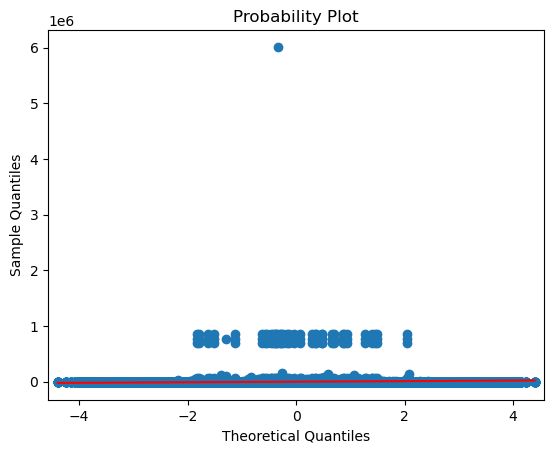

In [132]:
# another way to perform graphical method.    
import statsmodels.api as sm

# Create a probability plot
fig, ax = plt.subplots()
sm.qqplot(data, line='s', ax=ax)
ax.set_title('Probability Plot')

# Show the plot
plt.show()

/tmp/ipykernel_5989/3166164156.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


Text(0.5, 1.0, 'Distribution Plot')

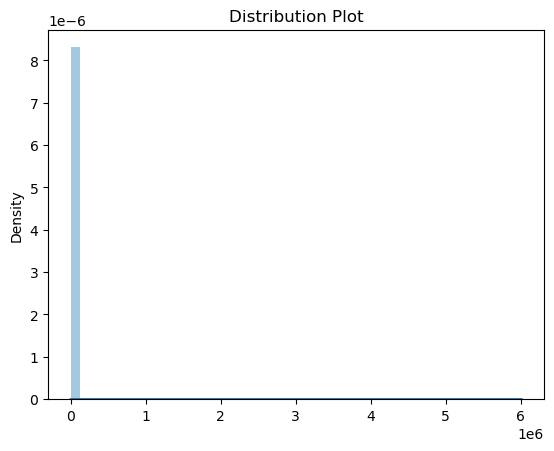

In [133]:
sns.distplot(data)
plt.title('Distribution Plot')

#### Q5: Hypothesis testing
1. Test (1) : Does the purchase amount affects the loyality score
* H0 : the purchase amount doesnot affect the loyality score
* Ha : the purchase amount affects the loyality score
> the result is The null hypothesis is accepted there is no relationship between loyality score & purchase amount

2. Test (2) : Is there a significant difference between the means of loyality score & month_lag ?
* H0 : there is no significant difference between the means of loyality score & month_lag
* Ha : there is a significant difference between the means of loyality score & month_lag
> The null hypothesis is rejected there is a significant difference between the means of loyality score & month_lag

In [134]:
import scipy.stats as stats

In [135]:
# Calculate the Pearson correlation coefficient and p-value
corr, p_value = stats.pearsonr( data['purchase_amount'],data['score'])

# Print the results
print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.00018199067942856455
p-value: 0.9381592452600391


The null hypothesis is accepted there is no relationship between loyality score & purchase amount

H0 : there is no significant difference between the means of loyality score & month_lag
Ha : there is a significant difference between the means of loyality score & month_lag

In [136]:
# Perform a t-test 
t_statistic, p_value = stats.ttest_ind( data['feature_3'],data['score'],)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 148.48555605827187
p-value: 0.0


The null hypothesis is rejected there is a significant difference between the means of loyality score & month_lag

#### Q6: Regression Analysis


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('score', axis=1), data['score'], test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (145391, 21) (145391,)
Testing set shape: (36348, 21) (36348,)


In [139]:
# First Regression Model!
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import sklearn.model_selection as ms
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
import math


In [140]:
# Create a LinearRegression object
model = linear_model.LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

tr_pred = model.predict(X_train)

y_pred = model.predict(X_test)

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

rmse_tr = math.sqrt(mean_squared_error(y_train, tr_pred))

# Evaluate the performance of the model on the testing data
print('Test RMSE:', rmse)

print('Train RMSE:', rmse_tr)

Test RMSE: 4.794490462068818
Train RMSE: 1.6746466817537096


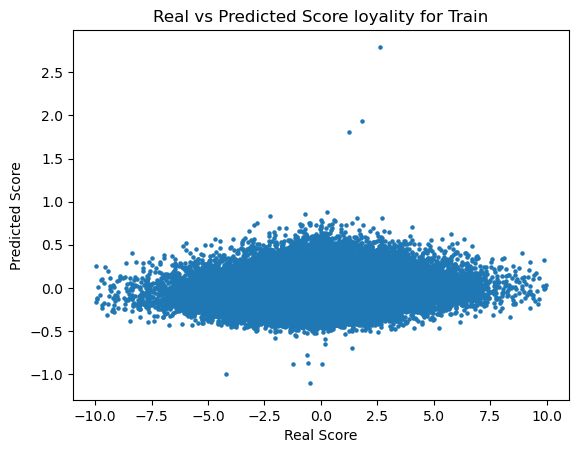

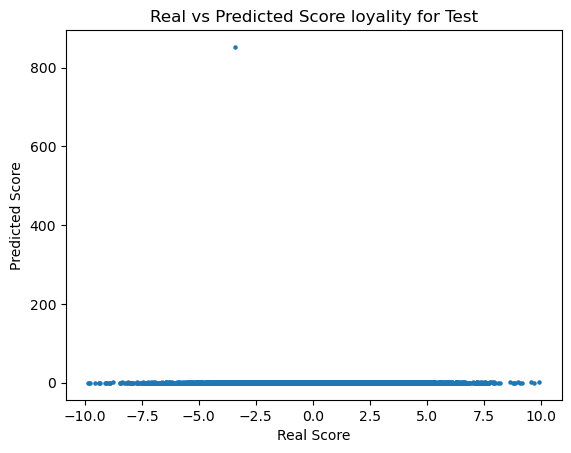

In [141]:
plt.scatter(y_train, tr_pred, s=5 )
plt.xlabel('Real Score')
plt.ylabel('Predicted Score')
plt.title( "Real vs Predicted Score loyality for Train")
plt.show()

plt.scatter(y_test, y_pred, s=5 )
plt.xlabel('Real Score')
plt.ylabel('Predicted Score')
plt.title( "Real vs Predicted Score loyality for Test")
plt.show()

#### Q7: multicollinearity
There is a multicollinearity between these columns:
*  'feature_1' & 'feature_3'
* 'avg_sales_lag3', 'avg_sales_lag6','avg_sales_lag12'
* 'avg_purchases_lag3', 'avg_purchases_lag6','avg_purchases_lag12'
* 'active_months_lag3', 'active_months_lag6'

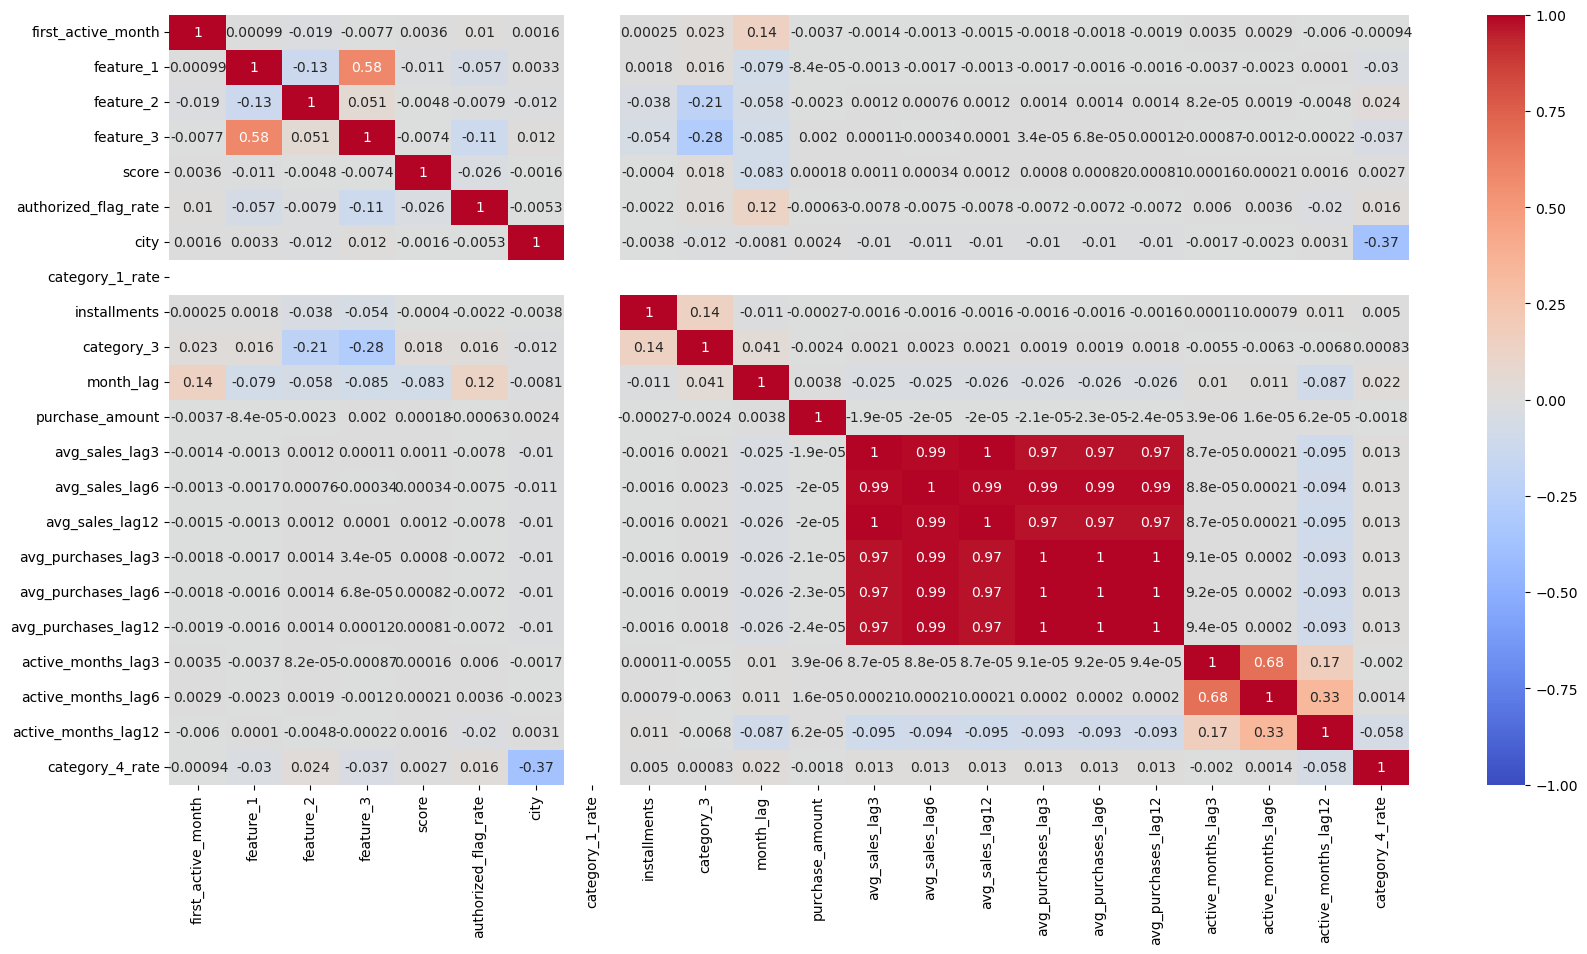

In [142]:

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

#### Check outliers

In [143]:
# Calculate the IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the range of outliers for each column
range_outliers = upper_bound - lower_bound

# Print the range of outliers for each column
print(range_outliers)

first_active_month      172.000000
feature_1                 8.000000
feature_2                 4.000000
feature_3                 4.000000
score                     6.440893
authorized_flag_rate      0.400000
city                    572.000000
category_1_rate           0.000000
installments             16.000000
category_3                4.000000
month_lag                15.234783
purchase_amount         162.774809
avg_sales_lag3            0.320000
avg_sales_lag6            0.480000
avg_sales_lag12           0.640000
avg_purchases_lag3        0.350177
avg_purchases_lag6        0.487307
avg_purchases_lag12       0.607802
active_months_lag3        0.000000
active_months_lag6        0.000000
active_months_lag12       0.000000
category_4_rate           3.880000
dtype: float64


In [144]:
# Remove the outliers from the Data
data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

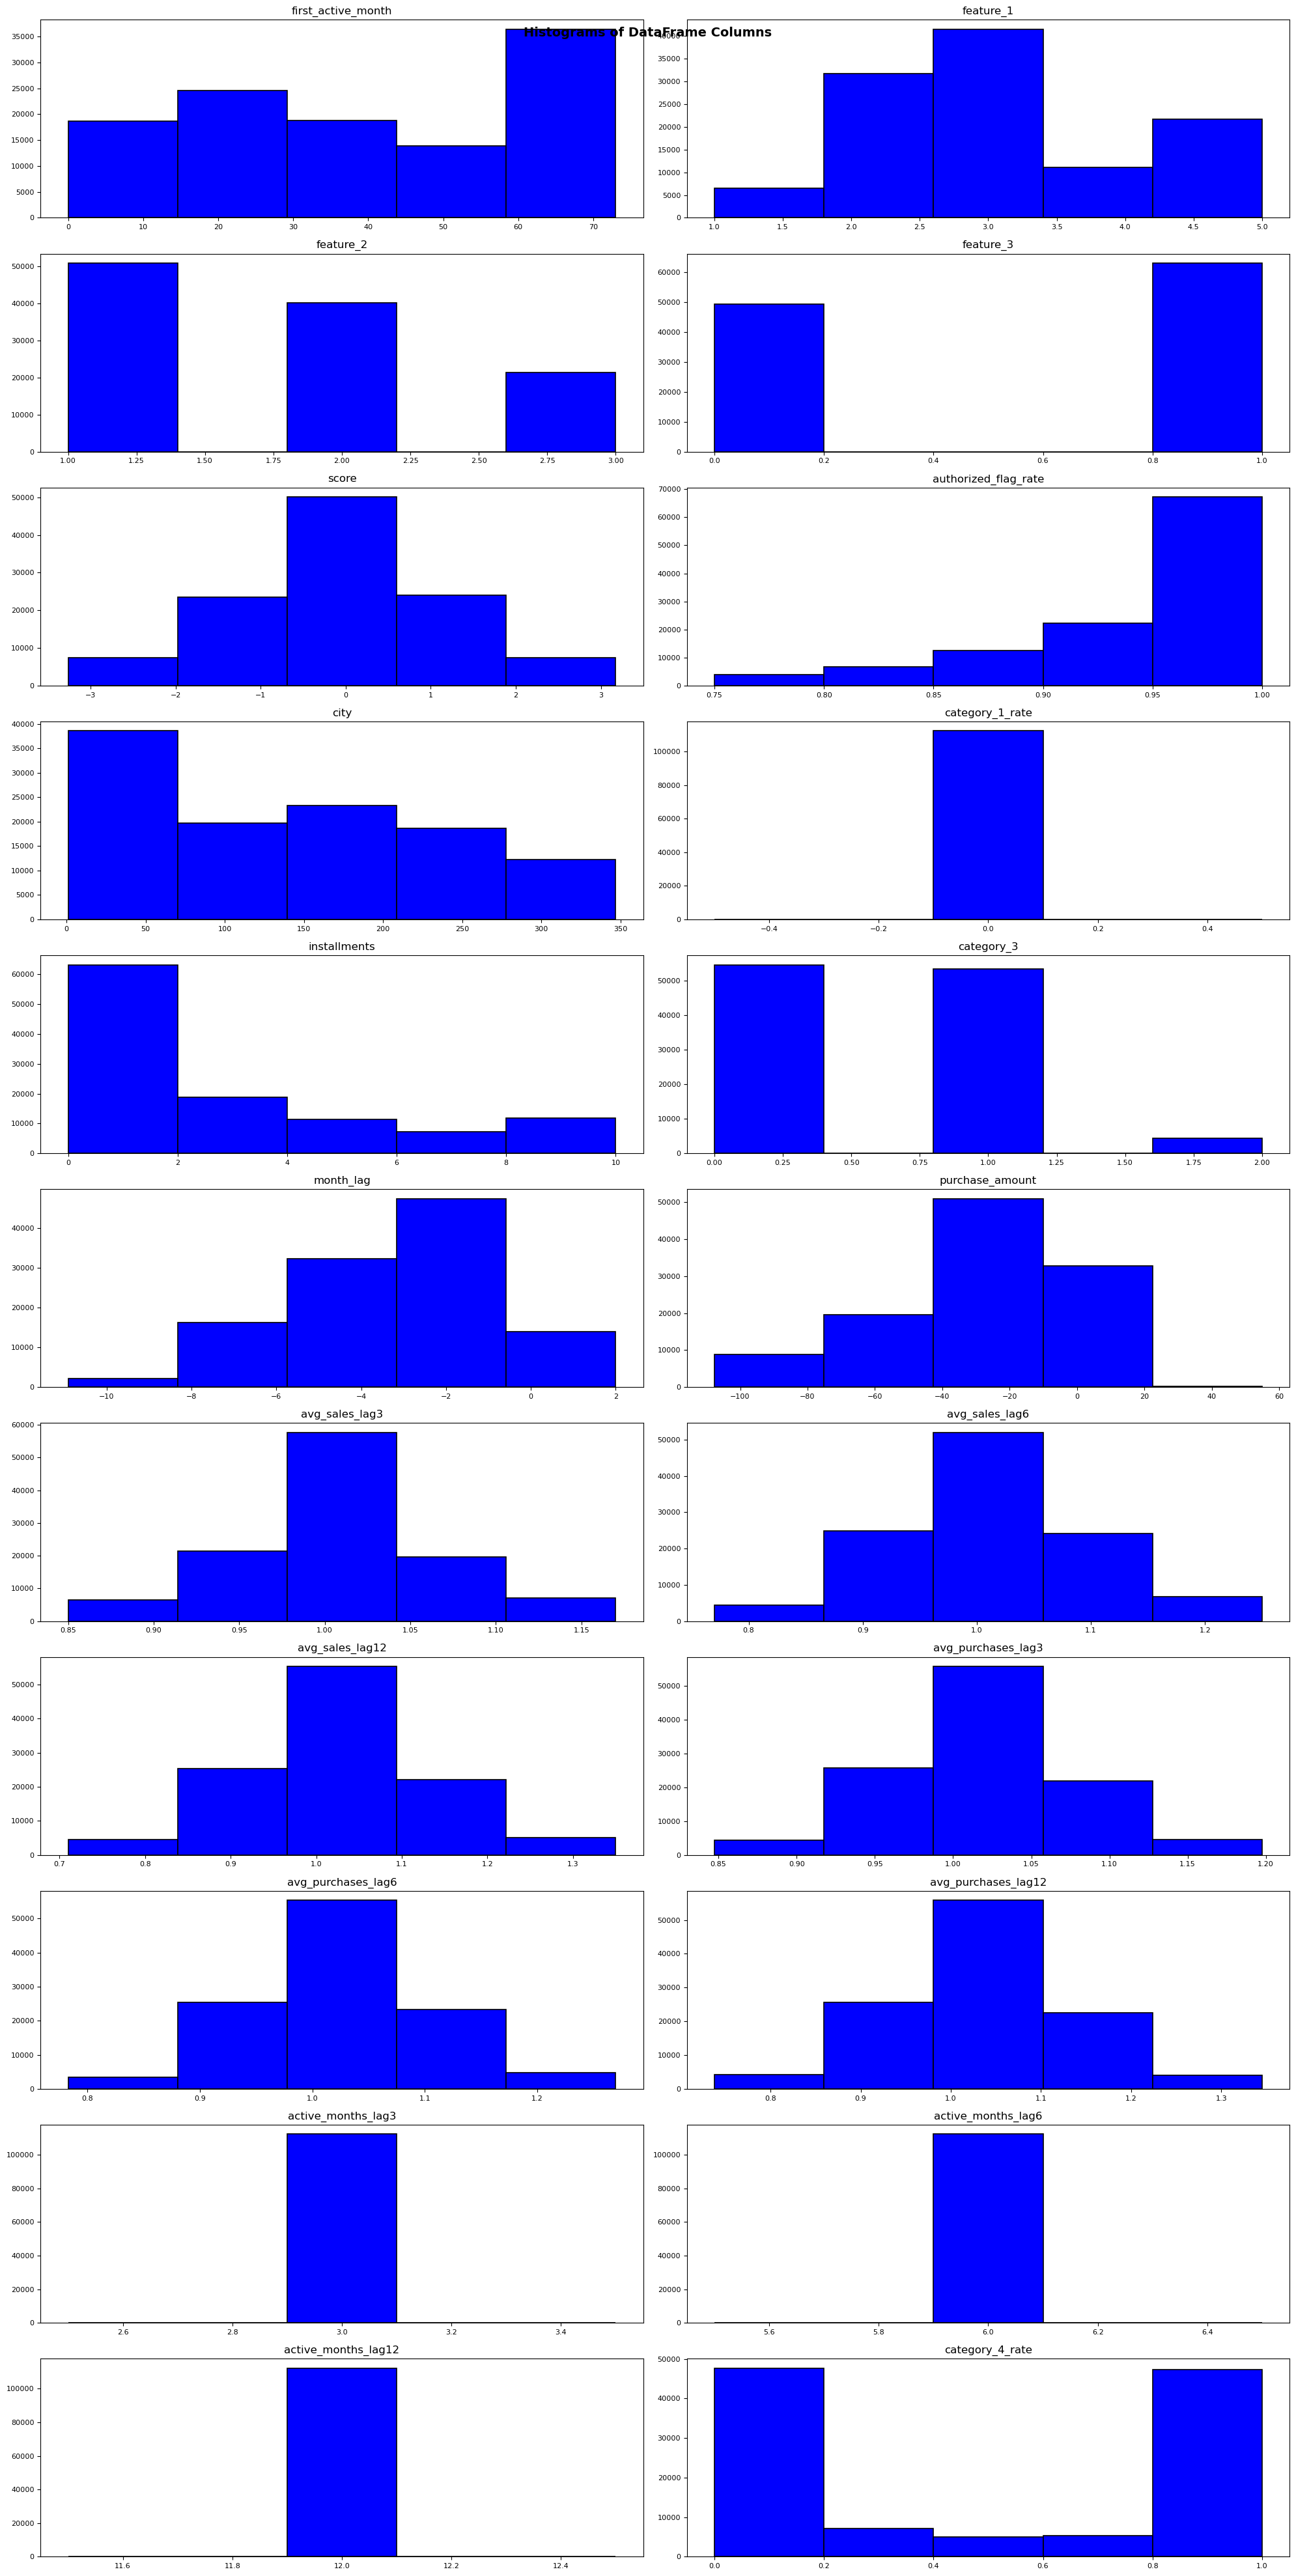

In [145]:
# Plot subplots of histograms for each column
data.hist(figsize=(20, 40), bins=5, color='blue', edgecolor='black', linewidth=1.2, xlabelsize=8, ylabelsize=8, grid=False, layout=(11, 2))

# Set plot titles and axis labels
plt.suptitle('Histograms of DataFrame Columns', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### Q8: Another Regression model

In [146]:
data.drop(['feature_3','avg_sales_lag3', 'avg_sales_lag6','avg_purchases_lag3', 'avg_purchases_lag6', 'active_months_lag6'],axis=1,inplace=True)

In [147]:
data.columns

Index(['first_active_month', 'feature_1', 'feature_2', 'score',
       'authorized_flag_rate', 'city', 'category_1_rate', 'installments',
       'category_3', 'month_lag', 'purchase_amount', 'avg_sales_lag12',
       'avg_purchases_lag12', 'active_months_lag3', 'active_months_lag12',
       'category_4_rate'],
      dtype='object')

In [148]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data.drop('score', axis=1), data['score'], test_size=0.2, random_state=42)

In [149]:
# Create a Gradient Boosting  model object
model_2 = GradientBoostingRegressor()

# Fit the model to the training data
model_2.fit(X_train2, y_train2)



tr_pred2 = model_2.predict(X_train2)
y_pred_2 = model_2.predict(X_test2)

# Calculate RMSE
rmse_2 = math.sqrt(mean_squared_error(y_test2, y_pred_2))

rmse_tr_2 = math.sqrt(mean_squared_error(y_train2, tr_pred2))

# Evaluate the performance of the model on the testing data
print('Test RMSE:', rmse_2)
print('Train RMSE:', rmse_tr_2)

Test RMSE: 1.2165048033399786
Train RMSE: 1.2050614950906426


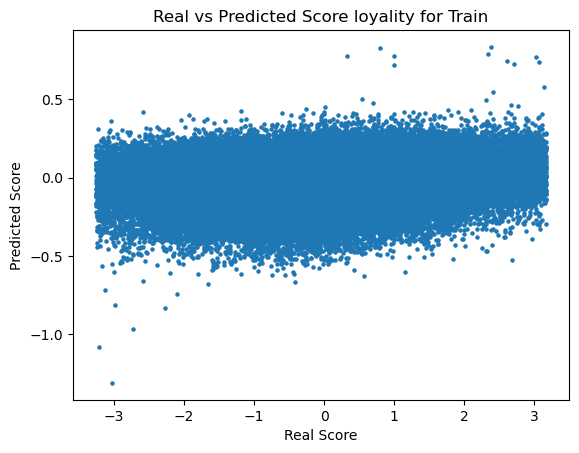

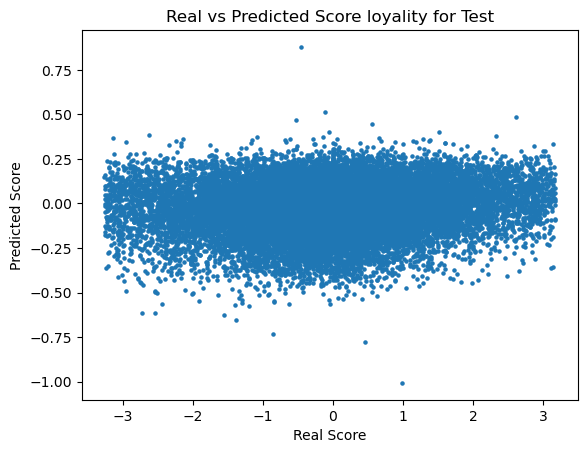

In [150]:
plt.scatter(y_train2, tr_pred2, s=5 )
plt.xlabel('Real Score')
plt.ylabel('Predicted Score')
plt.title( "Real vs Predicted Score loyality for Train")
plt.show()

plt.scatter(y_test2, y_pred_2, s=5 )
plt.xlabel('Real Score')
plt.ylabel('Predicted Score')
plt.title( "Real vs Predicted Score loyality for Test")
plt.show()

### Q1:
I think the best usage of three files is :
* the "df_historical_transactions" & "df_new_merchant_transactions" has the same columns with the same data types and same name so it's better to concatenate them 
* the "df_merchants" has 7 common variables ('city_id', 'category_1', 'merchant_category_id', 'merchant_id','category_2', 'state_id', 'subsector_id')  with both "df_historical_transactions" & "df_new_merchant_transactions" so we can merge them based on these variables
* After that I generated new features by aggregating the merchant_transactions features and then I merged them with the df_userscore to have the most insightful features without duplicates

### Q2 and Q3:
1. missing values
* df_merchants :
   *  the category_2 column has the highest number of missing values and it represent 3.5% of the data so we can drop them
   * the pattern of missing is general and the mechanism is MCAR in column "category_2 " as there is no correlation between it and other variables but I think in "avg_sale_lag3&6&12" the mechanism is MAR as the     correlation between them is 1 and that means The probability of a variable being missing depends on the other observed variables only.
   
* df_new_merchant_transactions :
     *  the category_2 column has the highest number of missing values and it represent 5% of the data so we can drop them
     *  the pattern of missing is General and the mechanism is MCAR as the the reason for missing data is unrelated to any observed or unobserved variables and that is shown from the heatmap
* df_userscore has no null values
* df_historical_transactions : 
    * the category_2 column has the highest number of missing values and it only represent 9% of the data so I will drop them
    * the pattern of missing is General and the mechanism is MCAR as the the reason for missing data is unrelated to any observed or unobserved variables and that is shown from the heatmap
    
2. Duplicates : there were no duplicates in all dataframes

3. Outliers : I checked the outliers and removed them 

### Q4: 
* I performed the shapiro normality test and I printed each column with their p-value & Test statistic and whether it's normally distributed or not
* I plotted the distribution plot and the qq plot and it shows that data wasn't normally distributed

### Q5: Hypothesis testing
1. Test (1) : Does the purchase amount affects the loyality score
* H0 : the purchase amount doesnot affect the loyality score
* Ha : the purchase amount affects the loyality score
> the result is The null hypothesis is accepted there is no relationship between loyality score & purchase amount

2. Test (2) : Is there a significant difference between the means of loyality score & month_lag ?
* H0 : there is no significant difference between the means of loyality score & month_lag
* Ha : there is a significant difference between the means of loyality score & month_lag
> The null hypothesis is rejected there is a significant difference between the means of loyality score & month_lag

### Q6: Regression Analysis

* I used the simple linear regression model and the result was bad as there was a huge difference between the RMSE on train and on so I am gonna:
    * check the multicollinearity between features as it affects regression models badly.
    * Try another more complex model like Gradient Boosing Regressor
    * check the outliers and remove it

### Q7:
 * After checking the  multicollinearity I found that there is a multicollinearity between these columns:
    *  'feature_1' & 'feature_3'
    * 'avg_sales_lag3', 'avg_sales_lag6','avg_sales_lag12'
    * 'avg_purchases_lag3', 'avg_purchases_lag6','avg_purchases_lag12'
    * 'active_months_lag3', 'active_months_lag6'
> I dropped the highly correlated features and keeped only the features with individual effects 

* After checking the  outliers I found many columns that has outliers so I removed the outliers to improve the model performance

### Q8:
* The new model has a better performance on the train and on Test and the RMSE for both were too close and the results was great  🥰

## Ps : It was so much fun to work on this assignment and I gained a generous amount of knowledge and I wanted to thank all of you for you efforts 💕